In [50]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

In [42]:
download_data("Cracow")
download_data("Brno")
download_data("Gliwice")

In [43]:
df_cracow = get_POI("Cracow.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

,elemtype,elemid,nodeid,lat,lon,key,value
,Symbol,Int64,Int64,Float64,Float64,String,String
1,node,28898012,28898012,50.2874,18.6641,public_transport,stop_position
2,node,29017182,29017182,50.2881,18.6603,public_transport,stop_position
3,node,29092672,29092672,50.2783,18.6579,public_transport,stop_position
4,node,192727330,192727330,50.191,18.8703,public_transport,stop_position
5,node,197994750,197994750,50.1825,18.6511,public_transport,stop_position
6,node,198120498,198120498,50.2876,18.654,public_transport,stop_position
7,node,198121009,198121009,50.2879,18.6545,public_transport,stop_position
8,node,198122611,198122611,50.2969,18.6588,public_transport,stop_position
9,node,198122619,198122619,50.2964,18.6571,public_transport,stop_position


In [44]:
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->500)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->500)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->500)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
15385 element(s) in 3 level(s) (1, 2, 200 node(s) per level):
 level=3 nchildren=2 mbr=((-14572.874403161311, -14399.46972170737), (9944.871016940759, 13299.92167291433)), 15385×10 DataFrame
   Row │ elemtype  elemid     nodeid       lat      lon      key               ⋯
       │ Symbol    Int64      Int64        Float64  Float64  String            ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node       28898012     28898012  50.2874  18.6641  public_transport  ⋯
     2 │ node       29017182     29017182  50.2881  18.6603  public_transport
     3 │ node       29092672     29092

In [85]:
points_cracow = generate_sectors(200,10,center_cracow,100)
points_brno = generate_sectors(200,10,center_brno,100)
points_gliwice = generate_sectors(200,10,center_gliwice,100)

200×100 Matrix{LLA}:
 LLA(50.2939, 18.6658, 7.82311e-6)   …  LLA(50.2939, 18.6658, 7.82311e-6)
 LLA(50.2939, 18.6659, 3.12952e-5)      LLA(50.2939, 18.6659, 3.12952e-5)
 LLA(50.2939, 18.6661, 7.04136e-5)      LLA(50.2939, 18.6661, 7.04145e-5)
 LLA(50.2939, 18.6662, 0.000125181)     LLA(50.2939, 18.6662, 0.00012518)
 LLA(50.2939, 18.6664, 0.000195596)     LLA(50.2939, 18.6664, 0.000195595)
 LLA(50.2939, 18.6665, 0.000281658)  …  LLA(50.2939, 18.6665, 0.000281656)
 LLA(50.2939, 18.6666, 0.000383369)     LLA(50.2939, 18.6666, 0.000383363)
 LLA(50.2939, 18.6668, 0.000500726)     LLA(50.2939, 18.6668, 0.00050072)
 LLA(50.2939, 18.6669, 0.000633729)     LLA(50.2939, 18.6669, 0.000633722)
 LLA(50.2939, 18.6671, 0.000782382)     LLA(50.2939, 18.6671, 0.000782373)
 ⋮                                   ⋱  
 LLA(50.295, 18.6926, 0.288417)         LLA(50.2939, 18.6926, 0.288414)
 LLA(50.295, 18.6927, 0.291429)         LLA(50.2939, 18.6927, 0.291426)
 LLA(50.295, 18.6928, 0.294457)         LLA(50.29

In [103]:
attr = :shopping
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

200-element Vector{Float64}:
 626.3199134003916
 625.7191319345651
 624.7554962892732
 623.4298200561569
 621.5986766044937
 619.1708329930098
 616.0791217094207
 612.2964106896808
 607.8492955527482
 602.7553395658709
   ⋮
  21.568392908417906
  21.54228273482667
  21.53919295000686
  21.460567055223365
  21.377897323842575
  21.303986314682973
  21.22018474644249
  21.089198022830015
  20.970431509621605

In [104]:
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

200-element Vector{Float64}:
 1.0
 0.9990079305378414
 0.9974166805564086
 0.9952275935382616
 0.9922038293202231
 0.988194735094028
 0.9830893972553509
 0.9768430126707461
 0.9694994986427548
 0.961087857366157
 ⋮
 0.0013747929977865616
 0.0013316773103944923
 0.0013265751537223352
 0.0011967403409218192
 0.0010602279472931135
 0.0009381788174923237
 0.0007997974234890792
 0.000583499258788909
 0.00038738030775064777

In [105]:
x_axis = [i*50 for i in 1:200]./1000

200-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  ⋮
  9.6
  9.65
  9.7
  9.75
  9.8
  9.85
  9.9
  9.95
 10.0

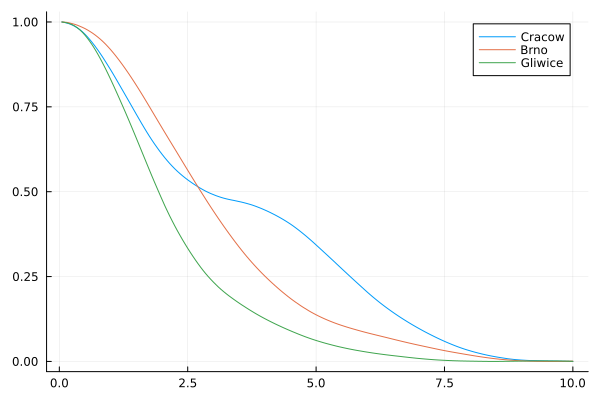

In [109]:
plot(x_axis,stand_cracow, label = "Cracow")#, marker=:circle)
plot!(x_axis,stand_brno, label = "Brno")#, marker=:circle)
plot!(x_axis,stand_gliwice, label = "Gliwice")#, marker=:circle)